In [ ]:
import keras
keras.__version__

'2.6.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/#MIT-Lab/#iEducation/Model_save/cats_and_dogs_small_1.h5')
model.summary()

In [ ]:
path_img = '/content/drive/MyDrive/#MIT-Lab/#iEducation/#Dataset/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
img_main = cv2.imread(path_img)
print(img_main.shape)
plt.imshow(img_main)
plt.show()

In [ ]:
layer names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names,activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(image_per_row):
      channel_image = layer_activation[0,:,:,col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col+1) * size, row * size: (row+1)*size = channel_image]

  scale = 1./size
  plt.figure(figsize = (scale * display_grid.shape[1], scale * display)grid.shape[0])
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

plt.show()

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow import keras
from keras import backend as K
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=False)
model.summary()

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
grads = K.gradients(loss, model.input)[0]

In [ ]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
print('loss_value: ', loss_value,'grads_value: ', grads_value)

loss_value:  0.0 grads_value:  [[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [ ]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [ ]:
def deprocess_image(x):
  x-= x.mean()
  x/=(x.std() + 1e-5)
  x*=0.1

  x+=0.5
  x=np.clip(x, 0, 1)

  x*= 255
  x=np.clip(x,0,255).astype('uint8')
  return x

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])

    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

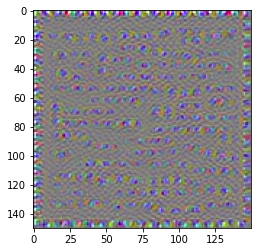

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(generate_pattern('block3_conv1', 2))
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16

K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
img_path = '/content/drive/MyDrive/#MIT-Lab/#iEducation/#Dataset/creative_commons_elephant.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
print(img.size)
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
print(x.shape)
# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
print(x.shape)
# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# We use cv2 to load the original image
img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
#plt.matshow(heatmap)
#plt.show()

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
heatmap_intensity_factor=0.8
superimposed_img = heatmap * heatmap_intensity_factor + img

# Save the image to disk
cv2.imwrite('/content/drive/MyDrive/#MIT-Lab/#iEducation/#Dataset/elephant_cam.jpg', superimposed_img)
cv2_imshow(superimposed_img)